In [1]:
# There are two ways to build keras model, one is sequential
# and other is functional. 
# sequential API allows to build the model layer by layer
from keras.models import Sequential

# Since layers are connected, thus we use Dense class
from keras.layers import Dense

# Dropout is the technique where nuerons are randomly
# not considered during the forward propogation and no weights
# are included for those nuerons during back propogation.
# The dropout occurs during training the model.
# Thus during training, the neighbouring nuerons 
# have to take place of the dropped nuerons
# and help in making predictions. 
# The result of dropout is that the network performs
# well for generalizing predictions. 
# Dropout is not used for testing.
from keras.layers import Dropout

# The constraints is the setting to limit the network 
# parameters(weight and biases),
# these constraints are applied per layer but are enforced 
# on each nueron during the training phase. 
from keras.constraints import maxnorm

# Keras will store the structure of model to .json file
# when we use to_json() function, the model will be loaded 
# back again from the point it was interrupted when 
# model_from_json() function is used. 
from keras.models import model_from_json

# gradient descent optimizer 
from keras import optimizers

import numpy as np

# metrics for viewing loss and accuracy
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

Using TensorFlow backend.


### We can save weights by using checkpoints of keras based on certain condition or by using model.save_weights() function.
#### here we are using save_weights.

In [2]:
# 768 observation and 9 variables
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
dataset.shape

(768, 9)

In [3]:
# Features(first 8 variables) and Targets(last variables) are assigned 
# to X and Y.
X = dataset[:,0:8]
Y = dataset[:,8] 

In [4]:
# np.random.seed(7) will produce the same set of network weights 
np.random.seed(7)

# building keras model using sequential API - layers
model = Sequential()

# we add a new Dropout layer between the input (or visible layer) 
# and the first hidden layer. The drop out rate is choosed as 50%. 
# "X" has 8 variables and so input_shape() is (8,)
# input_shape=(number_of_features,)
# note: here for dropout we use input_shape() instead of input_dim()
model.add(Dropout(0.5,input_shape=(8,)))

# adding 1st hidden layer which has 10 nuerons.
# activation function "relu" is used.
# relu function: y=max(0,x), returns the maximum
# The addition of product of inputs and the random weights of all the layers
# below will passed through the respective activation function.
# normal distribution will be used to initialise weights, 
# thus, "kernel_initializer='normal'"
# By adding "kernel_constraint=maxnorm(3)" weights are restricted to be below or equal to 3
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))

# adding 2nd hidden/output layer which has 8 neurons
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))

# adding 3rd hidden/output layer which has 1 neuron, the activation
# function used here is "sigmoid" which predicts the targets, ie. "Y"
# values between 1 and 0(probability). 
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# after adding all the layers to the model, compiling them together with
# additional properties such as gradient descent optimizer called "adam",
# loss: "binary_crossentropy" the predicted observations 
# from the sigmoid activation function will be used to compute 
# loss = -{(y\log(p) + (1 - y)\log(1 - p))}, where log is the natural log, 
# y is binary indicator (0 or 1) and p is predicted probability. Further 
# the weights will be reduced by optimizer till the loss is low or until
# the specified epochs are completed and below 3. Metric allows to monitor 
# the model while training. accuracy value and loss is generated for each epoch 
# in verbose output.
# compiling the model involves Tensorflow at backend using which the weights are
# evaluated and the predictions are made.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# The model created above will be now trained and tested simultaneously 
# with data using fit() function.
# For every epoch the loss will be decreased to its minimum.
# verbose = 0 turns off the output progress bars during training
# Validation_split() will split the "X" and "Y" dataset together, by 67%
# into training data set and the remaining 33% into validation data set. 
# if enabled, verbose output on each epoch shows the loss and accuracy on both the 
# training dataset and the validation dataset for every epoch.
history=model.fit(X,Y,validation_split=0.33,epochs=1000,verbose=0)

# evaluate() is for evaluating the already trained model using 
# the validation data.
# Returns the loss value and metrics value (accuracy) of the model
# for training/validation data.
scores = model.evaluate(X, Y)

# predict() generates output predictions for the input samples.
Y_predict = model.predict(X)

# model.metrics_names[0:2] has first element "loss" and 2nd "accuracy"
# where as scores 2nd element is loss and we are printing the same.
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))


# Saving the model structure in variable "model_json".
# creating a new file "model.json" in working directory and giving 
# writing permission. 
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# weights and biases are saved in "model.h5"
model.save_weights('model.h5')
print("")
print('===================')
print('Saved model to disk')
print('===================')

# since the "Y_predicted" values are in between 1 and 0
# because of sigmoid activation
# rounding the prediction values will classify the values
# in 1 and 0's. 
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')

#confusion matrix is used to evaluate the quality of the output of the model.
#The diagonal elements represent the number of points for which the predicted 
#label is equal to the true label, while off-diagonal elements are those that 
#are mislabeled by the model.
print("")
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 38us/step

accuracy: 65.36%

loss: 78.73%

Saved model to disk

Confusion Matrix
True negatives:  499
False negatives:  265
False positives:  1
True positives:  3


In [5]:
history.history.keys()
# acc and loss are from the training dataset.
# val_loss and val_acc are from testing/validation dataset.

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

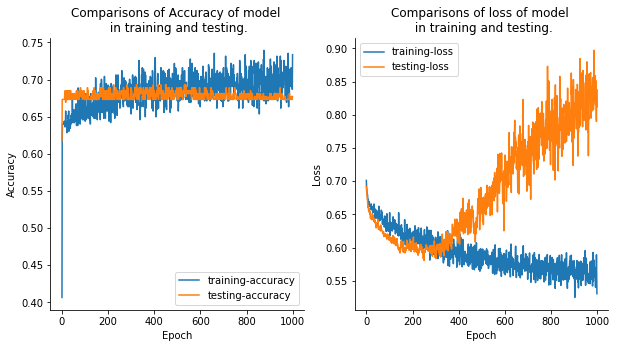

In [26]:
accuracy_training = history.history['acc']
loss_training = history.history['loss']
accuracy_testing = history.history['val_acc']
loss_testing = history.history['val_loss']

ax = plt.subplot(1,2,1)
ax.plot(accuracy_training,label='training-accuracy')
ax.plot(accuracy_testing,label='testing-accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Comparisons of Accuracy of model \n in training and testing.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(1,2,2)
ax.plot(loss_training,label='training-loss')
ax.plot(loss_testing,label='testing-loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Comparisons of loss of model \n in training and testing.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

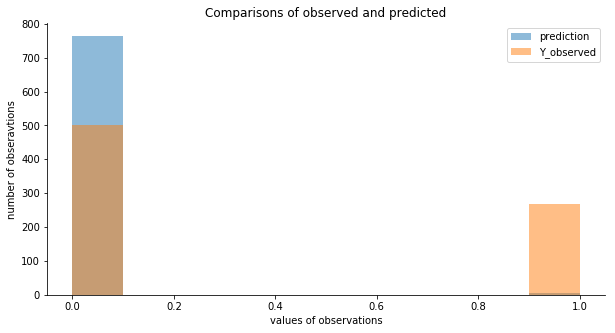

In [22]:
ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.5,histtype='stepfilled',label="prediction")
plt.hist(Y,alpha=0.5,histtype='stepfilled', label="Y_observed")
plt.xlabel("values of observations")
plt.ylabel("number of obseravtions")
plt.legend()
plt.title("Comparisons of observed and predicted")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# =========================================

In [24]:
#loading model from model.json and weights from model.h5
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8] 
np.random.seed(7)
model = Sequential()
model.add(Dropout(0.5,input_shape=(8,))) 
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3))) 
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history=model.fit(X,Y, validation_split=0.33, epochs=500,verbose=0)
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("")
print('===================')
print('Saving model to disk')
model_json = model.to_json()
# writing into the json file
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')

768/768 [==============================] - 0s 65us/step

acc: 66.02%

loss: 64.83%

Saving model to disk


In [27]:
# reading from the json file
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
print('===================')
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#history_loaded=loaded_model.fit(X,Y, validation_split=0.33, epochs=500,verbose=0)
score = loaded_model.evaluate(X, Y, verbose=0)
print("metrics after loading model from the disk")
print("\n%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print("\n%s: %.2f%%" % (loaded_model.metrics_names[0], score[0]*100))

Loaded model from disk
metrics after loading model from the disk

acc: 66.02%

loss: 64.83%


# =========================================

In [29]:
# drop-out is for input nuerons alone. 
def nueral_network(dropout, validation_ratio):
    dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
    X = dataset[:,0:8]
    Y = dataset[:,8] 
    np.random.seed(7)
    model = Sequential()
    model.add(Dropout(dropout,input_shape=(8,))) 
    model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3))) 
    model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    history=model.fit(X,Y, validation_split=validation_ratio, epochs=1000,verbose=0)
    scores = model.evaluate(X, Y)
    Y_predict = model.predict(X)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
    print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
    print("")
    print('===================')
    print('Saving model to disk')
    model_json = model.to_json()
    with open('model.json', 'w') as json_file:
        json_file.write(model_json)
    model.save_weights('model.h5')
    print("")
    print('===================')
    print('Saved model to disk')
    rounded = [round(i[0]) for i in Y_predict]
    y_pred = np.array(rounded,dtype='int64')
    print("")
    print('Confusion Matrix')
    print('================')
    CM = confusion_matrix(Y, y_pred)
    print('True negatives: ',CM[0,0])
    print('False negatives: ',CM[1,0])
    print('False positives: ',CM[0,1])
    print('True positives: ',CM[1,1])
    print("")
    
    accuracy_training = history.history['accuracy']
    loss_training = history.history['loss']
    accuracy_testing = history.history['val_accuracy']
    loss_testing = history.history['val_loss']
    print("============================================================================")
    print("")
    ax = plt.subplot(1,2,1)
    ax.plot(accuracy_training,label='training-accuracy')
    ax.plot(accuracy_testing,label='testing-accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy of model \n during training and testing.")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax = plt.subplot(1,2,2)
    ax.plot(loss_training,label='training loss')
    ax.plot(loss_testing,label='testing loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("loss of model \n during training and testing")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # ax = plt.subplot(1,3,3)
    # plt.hist(y_pred,alpha=0.5,histtype='stepfilled',label="prediction")
    # plt.hist(Y,alpha=0.5,histtype='stepfilled', label="Y_observed")
    # plt.xlabel("values of observations")
    # plt.ylabel("number of obseravtions")
    # plt.legend()
    # plt.title("Comparisons of observed \n and predicted")
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    plt.show()
    # plt.rcParams['figure.figsize'] = [4,16]
    # plt.rcParams['figure.figsize'] = [16,8]
    plt.close()

768/768 [==============================] - 0s 13us/step

accuracy: 77.86%

loss: 45.28%

Saving model to disk

Saved model to disk

Confusion Matrix
True negatives:  473
False negatives:  143
False positives:  27
True positives:  125




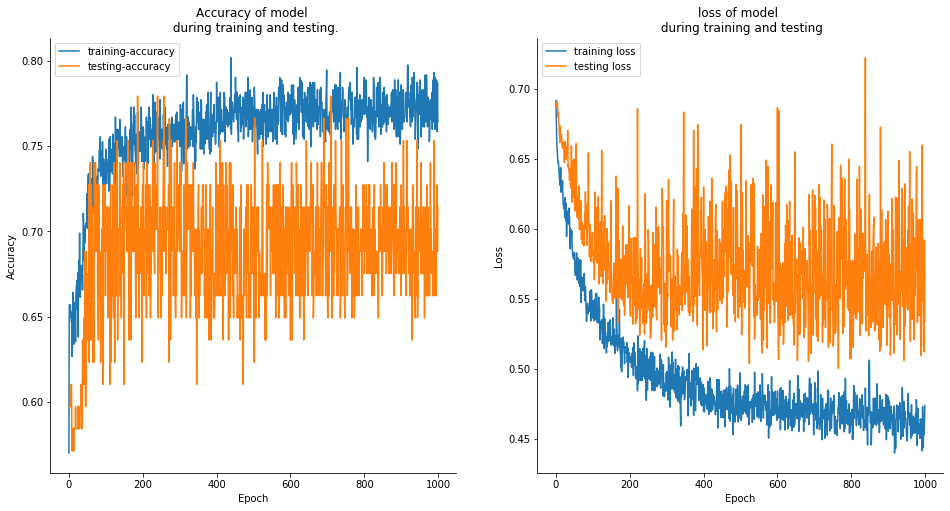

In [57]:
# neural_network(drop_out=10%, validation_split=10%)
nueral_network(0.1, 0.1)

768/768 [==============================] - 0s 14us/step

accuracy: 73.44%

loss: 53.35%

Saving model to disk

Saved model to disk

Confusion Matrix
True negatives:  490
False negatives:  194
False positives:  10
True positives:  74




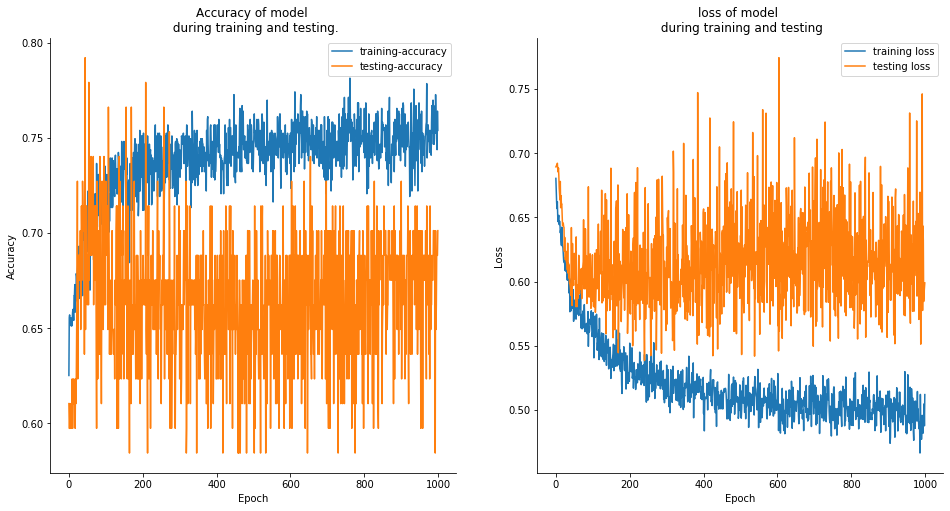

In [30]:
# neural_network(drop_out=20%, validation_split=10%)
nueral_network(0.2, 0.1)

768/768 [==============================] - 0s 13us/step

accuracy: 67.19%

loss: 66.29%

Saving model to disk

Saved model to disk

Confusion Matrix
True negatives:  499
False negatives:  251
False positives:  1
True positives:  17




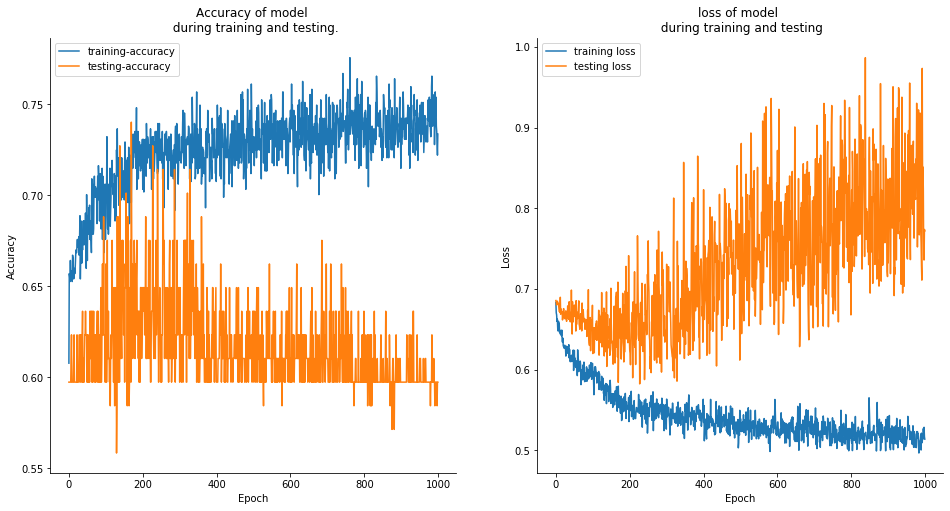

In [31]:
# neural_network(drop_out=30%, validation_split=10%)
nueral_network(0.3, 0.1)

768/768 [==============================] - 0s 22us/step

accuracy: 75.91%

loss: 49.37%

Saving model to disk

Saved model to disk

Confusion Matrix
True negatives:  483
False negatives:  168
False positives:  17
True positives:  100




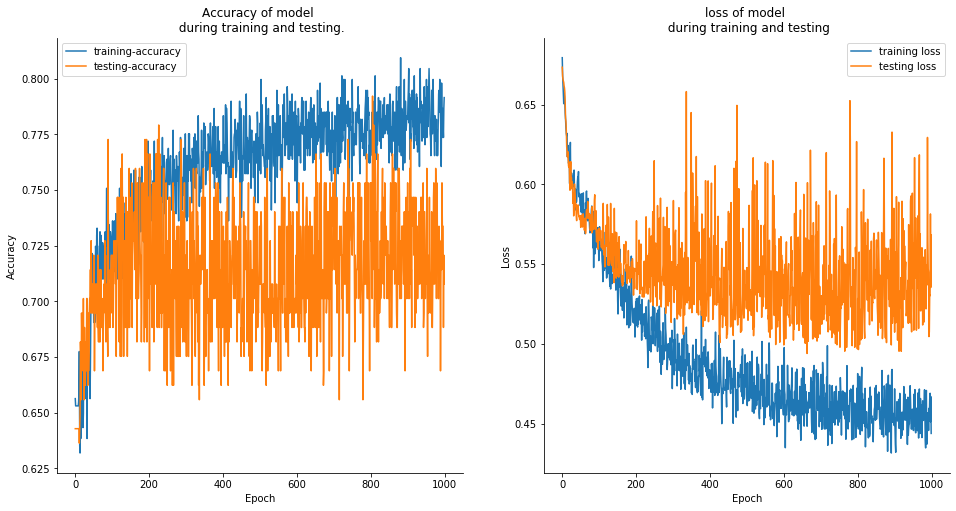

In [32]:
# neural_network(drop_out=10%, validation_split=20%)
nueral_network(0.1, 0.2)

768/768 [==============================] - 0s 21us/step

accuracy: 67.97%

loss: 64.60%

Saving model to disk

Saved model to disk

Confusion Matrix
True negatives:  496
False negatives:  242
False positives:  4
True positives:  26




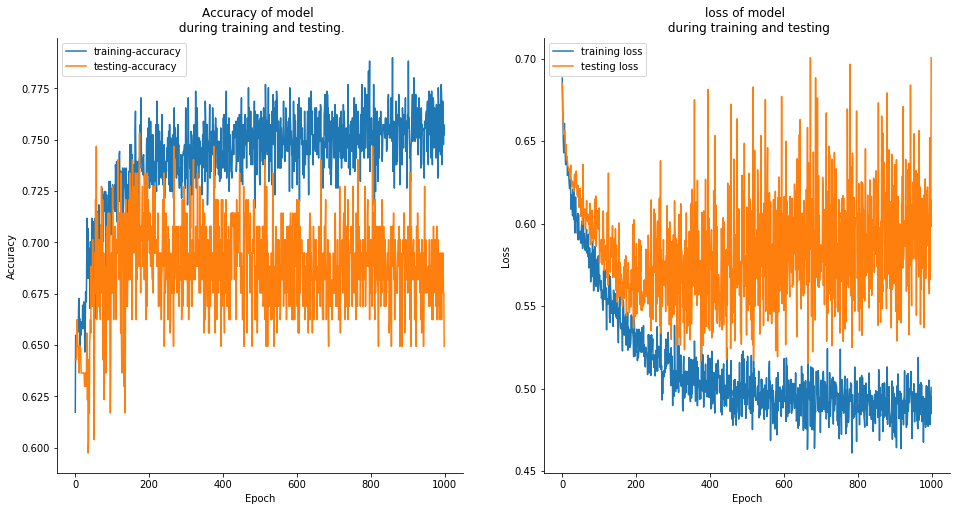

In [34]:
# neural_network(drop_out=20%, validation_split=20%)
nueral_network(0.2, 0.2)

768/768 [==============================] - 0s 17us/step

accuracy: 66.02%

loss: 78.33%

Saving model to disk

Saved model to disk

Confusion Matrix
True negatives:  500
False negatives:  261
False positives:  0
True positives:  7




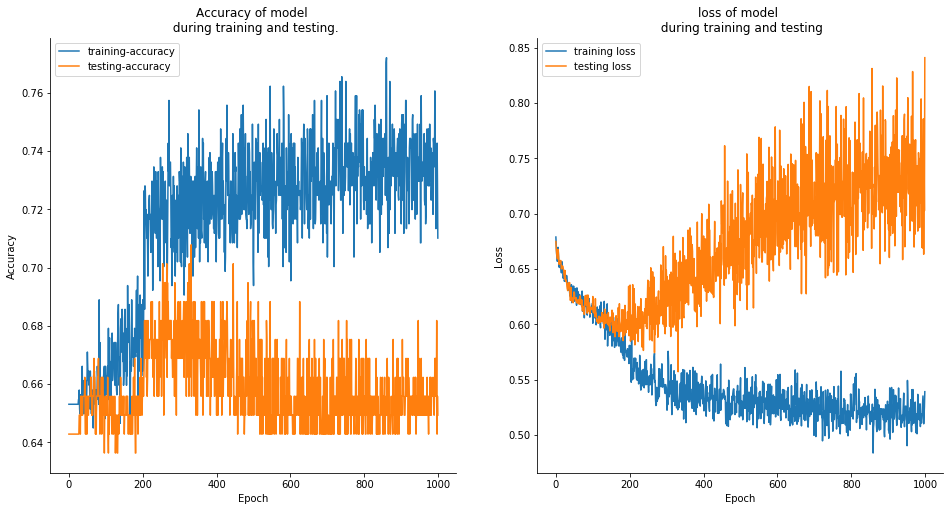

In [35]:
# neural_network(drop_out=30%, validation_split=20%)
nueral_network(0.3, 0.2)

768/768 [==============================] - 0s 18us/step

accuracy: 78.26%

loss: 45.29%

Saving model to disk

Saved model to disk

Confusion Matrix
True negatives:  477
False negatives:  144
False positives:  23
True positives:  124




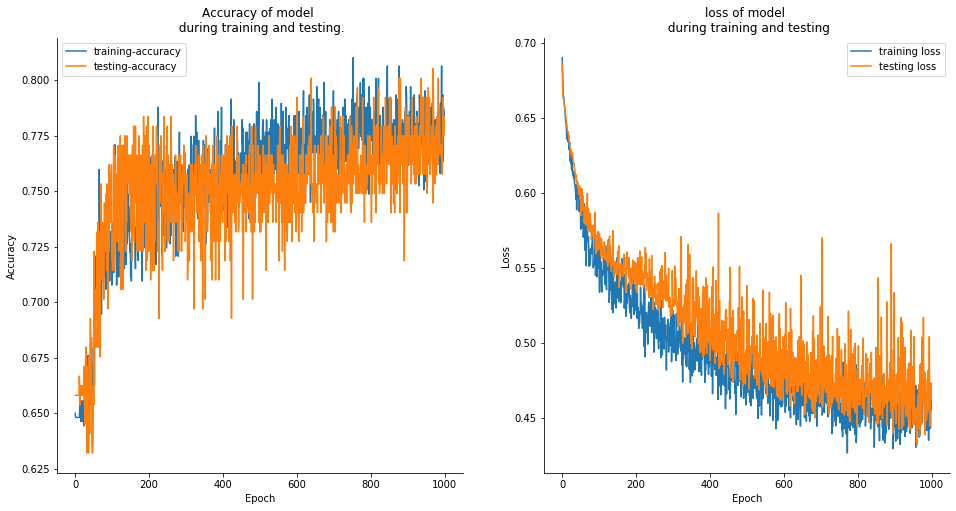

In [36]:
# neural_network(drop_out=10%, validation_split=30%)
nueral_network(0.1, 0.3)

768/768 [==============================] - 0s 23us/step

accuracy: 69.40%

loss: 59.24%

Saving model to disk

Saved model to disk

Confusion Matrix
True negatives:  495
False negatives:  230
False positives:  5
True positives:  38




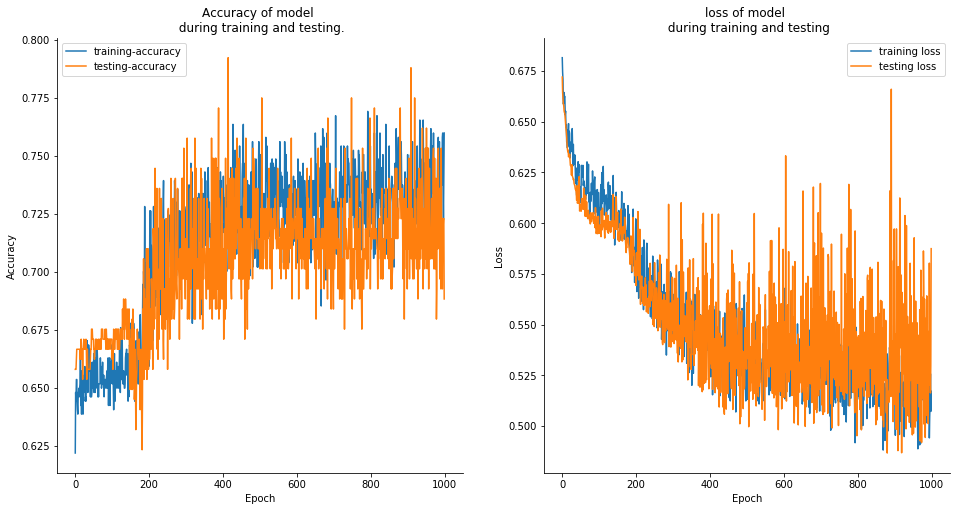

In [37]:
# neural_network(drop_out=20%, validation_split=30%)
nueral_network(0.2, 0.3)

768/768 [==============================] - 0s 30us/step

accuracy: 67.32%

loss: 62.79%

Saving model to disk

Saved model to disk

Confusion Matrix
True negatives:  497
False negatives:  248
False positives:  3
True positives:  20




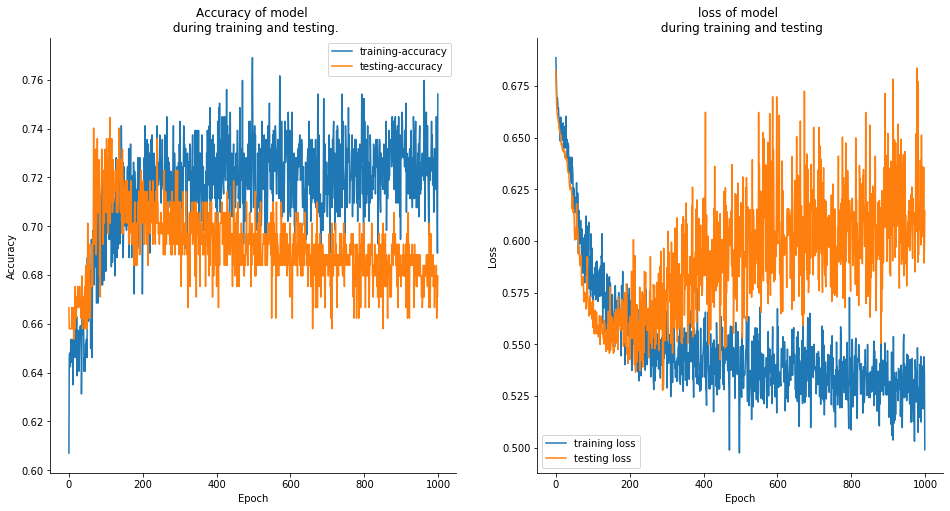

In [38]:
# neural_network(drop_out=30%, validation_split=30%)
nueral_network(0.3, 0.3)

### Comparing all the values and plots, the first model with 10% dropout and 10% validation_split has the highest accuracy of approximately 78% and lowest loss of 43%, but only during training the model. The 7th model with dropout of 10% and split of 30% has its both accuracy and loss of training equal to that of testing, with 50% loss and 75% accuracy better than first model. 

refrences:

https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/ : dropout

https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/ : constraints

https://machinelearningmastery.com/save-load-keras-deep-learning-models/ 